In [1]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

In [2]:
from token import token

ImportError: cannot import name 'token' from 'token' (/Users/aleksandr/anaconda3/lib/python3.11/token.py)

In [4]:
PASSWORD = "nmspcdlvtbjovydl"  
YANDEX_SMTP = "smtp.yandex.ru"
YANDEX_PORT = 465 
EMAIL = "sashapastusenko@yandex.ru"
PASSWORD = "jebkjerbwv"  

msg = MIMEMultipart()
msg["From"] = EMAIL
msg["To"] = "pastushenkoaxlex@mail.ru"
msg["Subject"] = "Тест из Python"

body = "Привет! Это тестовое письмо из Python."
msg.attach(MIMEText(body, "plain"))


try:
    with smtplib.SMTP_SSL(YANDEX_SMTP, YANDEX_PORT) as server:
        server.login(EMAIL, PASSWORD)
        server.send_message(msg)
    print("Письмо отправлено!")
except Exception as e:
    print(f"Ошибка: {e}")

Письмо отправлено!


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url = "https://books.toscrape.com/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    book_data = []
    for book in books:
        title = book.h3.a['title'] 
        price = book.select_one('.price_color').get_text()  
        rating = book.select_one('.star-rating')['class'][1]  

        book_data.append({
            'title': title,
            'price': price,
            'rating': rating
        })

  
    for book in book_data:
        print(f"Название: {book['title']}")
        print(f"Цена: {book['price']}")
        print(f"Рейтинг: {book['rating']}")
        print("-" * 50)
else:
    print(f"Ошибка при запросе к сайту. Код состояния: {response.status_code}")

Название: A Light in the Attic
Цена: £51.77
Рейтинг: Three
--------------------------------------------------
Название: Tipping the Velvet
Цена: £53.74
Рейтинг: One
--------------------------------------------------
Название: Soumission
Цена: £50.10
Рейтинг: One
--------------------------------------------------
Название: Sharp Objects
Цена: £47.82
Рейтинг: Four
--------------------------------------------------
Название: Sapiens: A Brief History of Humankind
Цена: £54.23
Рейтинг: Five
--------------------------------------------------
Название: The Requiem Red
Цена: £22.65
Рейтинг: One
--------------------------------------------------
Название: The Dirty Little Secrets of Getting Your Dream Job
Цена: £33.34
Рейтинг: Four
--------------------------------------------------
Название: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Цена: £17.93
Рейтинг: Three
--------------------------------------------------
Название: The Boys in the Boat: Nine Am

In [7]:
response

<Response [200]>

In [8]:
data = pd.DataFrame(book_data)
data

,title,price,rating
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five
5,The Requiem Red,£22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,The Black Maria,£52.15,One


In [9]:
rating_dict = {'One' : 1, 'Two' : 2, 'Three' : 3, 'Four' : 4, 'Five' : 5}
data['rating'] = data['rating'].map(rating_dict)

<Axes: >

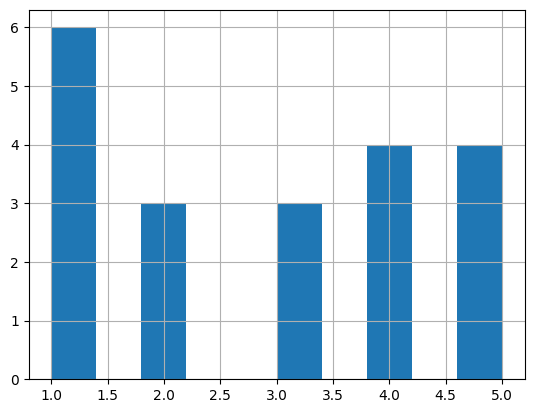

In [10]:
data['rating'].hist()

In [11]:
# Функция для извлечения данных с одной страницы
def scrape_page(url):
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Ошибка при запросе к {url}. Код состояния: {response.status_code}")
        return []

    soup = BeautifulSoup(response.content, 'html.parser')
    books = soup.find_all('article', class_='product_pod')

    book_data = []
    for book in books:
        title = book.h3.a['title']  # Название книги
        price = book.select_one('.price_color').get_text()  # Цена книги
        rating = book.select_one('.star-rating')['class'][1]  # Рейтинг книги

        book_data.append({
            'Название': title,
            'Цена': price,
            'Рейтинг': rating
        })

    return book_data

# Функция для получения ссылки на следующую страницу
def get_next_page_url(soup):
    next_page = soup.find('li', class_='next')
    if next_page:
        return next_page.a['href']
    return None

# Основной цикл для сбора данных со всех страниц
def scrape_all_pages(base_url):
    all_books = []
    current_url = base_url

    while True:
        print(f"Обработка страницы: {current_url}")
        page_data = scrape_page(current_url)
        all_books.extend(page_data)

        # Переходим к следующей странице
        soup = BeautifulSoup(requests.get(current_url).content, 'html.parser')
        next_page_url = get_next_page_url(soup)
        if not next_page_url:
            break

        # Обновляем URL для следующей итерации
        current_url = base_url + next_page_url

    return all_books

# Базовый URL сайта
base_url = "https://books.toscrape.com/"

# Собираем данные со всех страниц
all_books_data = scrape_all_pages(base_url)

# Преобразуем данные в DataFrame
df = pd.DataFrame(all_books_data)

# Выводим результаты
df

Обработка страницы: https://books.toscrape.com/
Обработка страницы: https://books.toscrape.com/catalogue/page-2.html
Обработка страницы: https://books.toscrape.com/page-3.html
Ошибка при запросе к https://books.toscrape.com/page-3.html. Код состояния: 404


,Название,Цена,Рейтинг
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five
5,The Requiem Red,£22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,The Black Maria,£52.15,One


In [ ]:
from multiprocessing import Pool, cpu_count

# Функция для извлечения данных с одной страницы
def scrape_page(url):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Ошибка при запросе к {url}. Код состояния: {response.status_code}")
            return []

        soup = BeautifulSoup(response.content, 'html.parser')
        books = soup.find_all('article', class_='product_pod')

        book_data = []
        for book in books:
            title = book.h3.a['title']  # Название книги
            price = book.select_one('.price_color').get_text()  # Цена книги
            rating = book.select_one('.star-rating')['class'][1]  # Рейтинг книги

            book_data.append({
                'Название': title,
                'Цена': price,
                'Рейтинг': rating
            })

        print(f"Обработана страница: {url}")
        return book_data
    except Exception as e:
        print(f"Ошибка при обработке страницы {url}: {e}")
        return []

# Функция для получения всех ссылок на страницы
def get_all_pages(base_url):
    all_pages = [base_url]
    current_url = base_url

    while True:
        response = requests.get(current_url)
        if response.status_code != 200:
            break

        soup = BeautifulSoup(response.content, 'html.parser')
        next_page = soup.find('li', class_='next')
        if not next_page:
            break

        next_page_url = next_page.a['href']
        current_url = base_url + next_page_url
        all_pages.append(current_url)

    return all_pages

# Основная функция для многопроцессорного парсинга
def main():
    # Базовый URL сайта
    base_url = "https://books.toscrape.com/"

    # Получаем список всех страниц
    all_pages = get_all_pages(base_url)
    print(f"Найдено страниц для обработки: {len(all_pages)}")

    # Создаем пул процессов
    num_processes = cpu_count()
    print(f"Используется {num_processes} процессов для парсинга.")

    with Pool(processes=num_processes) as pool:
        # Парсим все страницы параллельно
        results = pool.map(scrape_page, all_pages)

    # Объединяем результаты
    all_books_data = [book for page_result in results for book in page_result]

    # Преобразуем данные в DataFrame
    df = pd.DataFrame(all_books_data)

    df

if __name__ == "__main__":
    main()

Найдено страниц для обработки: 3
Используется 12 процессов для парсинга.


In [1]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication

# Настройки SMTP-сервера Яндекс
smtp_server = "smtp.yandex.ru"  # SMTP-сервер Яндекс
smtp_port = 465  # Порт для SSL
sender_email = "daniila.tsybin@yandex.ru"  # Ваш email на Яндексе
sender_password = "nmspcdlvtbjovydl"  # Пароль или приложенный ключ

# Получатель и содержимое письма
receiver_email = "salim_s_02@mail.ru"  # Email получателя
subject = "Тестовое письмо с PDF-вложением от Python"
body = "Привет! Это тестовое письмо с PDF-вложением, отправленное с помощью Python."

# Путь к PDF-файлу
pdf_path = "счет.pdf"  # Укажите путь к вашему PDF-файлу

# Создание объекта MIMEMultipart
message = MIMEMultipart()
message["From"] = sender_email
message["To"] = receiver_email
message["Subject"] = subject

# Добавление текста в письмо
message.attach(MIMEText(body, "plain"))

# Добавление PDF-файла как вложения
try:
    with open(pdf_path, "rb") as attachment:
        part = MIMEApplication(attachment.read(), _subtype="pdf")
        part.add_header(
            "Content-Disposition",
            f"attachment; filename={pdf_path.split('/')[-1]}",
        )
        message.attach(part)
except Exception as e:
    print(f"Ошибка PDF-файла: {e}")
    exit()

# Отправка письма
try:
    # Создание безопасного SSL-соединения с SMTP-сервером
    with smtplib.SMTP_SSL(smtp_server, smtp_port) as server:
        # Вход в аккаунт
        server.login(sender_email, sender_password)

        # Отправка письма
        server.sendmail(sender_email, receiver_email, message.as_string())
        print("Письмо успешно отправлено с PDF-вложением!")
except Exception as e:
    print(f"Ошибка при отправке письма: {e}")

Письмо успешно отправлено с PDF-вложением!
